### Data Classes

In [1]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score >= 4:
            return Sentiment.POSITIVE
        # let's ignore the reviews with 3 stars

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
        

### Data Loading

In [2]:
import json

file_name = 'C:/Electronics_5_small.json'    # 75k entries

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[0].text
        

'I really like the length and quality of this cable.  All of the other micro usb cables I have are not long enough to allow me to use my phone while it is plugged in.  This cable makes that possible and is much better quality than previous ones that I have purchased.  So far, all three of the ones I purchased are holding up perfectly.'

### Data Preparation

In [3]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42) # let's use 42 since it is the answer to everything

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [4]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

5697
5697


#### Bag of words vectorization

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())


I've used Yamaha Receivers and components for 30+ years and every one has been flawless after several years of heavy use.  This receiver is a great upgrade to the 21st Century -- convergence of traditional audio/video sources with the newest streaming technologies.I won't go into all the features;  you can read about those.  I'll talk about my use and how well it works.  First and foremost for me is quality sound reproduction whether streaming, listening to CDs, lossless iPod tracks, or watching Blu-Ray movies with the newest digital surround formats.  This unit doesn't disappoint.  It carries on the exceptional sound quality tradition of Yamaha past units.  Depth, clarity, warmth, digital signal processing (defeatable), all define Yamaha sound.It is the centerpiece of an integrated networked nine speaker home theater system with a new 55inch Sony TV, TiVo, Apple TV, Roku 3, and Blu-Ray DVD player.So, why upgrade?  Simply, one wire HDMI connection to all devices, easy home network inte

## Classification

#### Linear SVM



















In [6]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

#### Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

#### Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)

clf_gnb.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

clf_log.predict(test_x_vectors[0])



array(['NEGATIVE'], dtype='<U8')

## Results Evaluation

In [10]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8622357577929057
0.6884629165173772
0.6963453959154425
0.8609817269795772


In [24]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.86166577, 0.86280107])

In [25]:
f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.69259325, 0.68422008])

In [26]:
f1_score(test_y, clf_gnb.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.69920142, 0.69343462])

In [27]:
f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.86023055, 0.86172488])

In [12]:
# Arbitrary strings
test_set = ["nice product!", "incredibly good device", "not good at all", "it broke after 3 days", 
            "it doesn't work properly", "it's amazing", "I had to return it", "it feels old", "it fell apart quickly",
            "I don't know why Amazon still sells this", "it went straight to the trash", "it's garbage", "it does what it's meant to do",
            "it works fine", "recommended", "you should buy it now", "it looks good but it does not work as intended", 
            "today is a sunny day", "good morning my dear", "traffic around here has been quite noisy in the past few days", 
            "I crashed my car into a tree", "today is a rainy day"]
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)


array(['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE'], dtype='<U8')

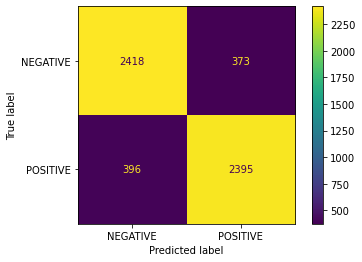

In [13]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  

plot_confusion_matrix(clf_svm, test_x_vectors, test_y)  
plt.show()

In [30]:
clf_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning our model (with Grid Search)

In [14]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [29]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None,
 'param_grid': {'kernel': ('linear', 'rbf'), 'C': (1, 4, 8, 16, 32)},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [28]:
print(clf.score(test_x_vectors, test_y))
test_set = ["nice product!", "incredibly good device", "not good at all", "it broke after 3 days", 
            "it doesn't work properly", "it's amazing", "I had to return it", "it feels old", "it fell apart quickly",
            "I don't know why Amazon still sells this", "it went straight to the trash", "it's garbage", "it does what it's meant to do",
            "it works fine", "recommended", "you should buy it now", "it looks good but it does not work as intended", 
            "today is a sunny day", "good morning my dear", "traffic around here has been quite noisy in the past few days", 
            "I crashed my car on a tree", "today is a rainy day"]
clf_test = vectorizer.transform(test_set)
clf.predict(new_test)

0.864206377642422


array(['POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE'], dtype='<U8')

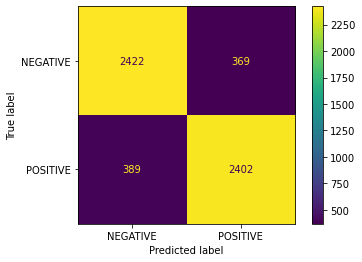

In [16]:
plot_confusion_matrix(clf, test_x_vectors, test_y)  
plt.show()

## Saving the Model

In [17]:
import pickle

with open('./models/sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(clf_svm, f)
